# Sobre el dataset 1

## Fuente y tipo de datos
.CSV

## Características
Número de registros: Filas: 6387145, Columnas: 23

Atributos: 23

Tamaño de los datos: Esto lo podemos ver en detalle exceptuando los datos faltantes en la celda 14

## Nivel de Documentación disponible y posibles aplicaciones
El dataset de kaggle es bastante completo y tiene información sobre el dataset en general, se puede consultar directamente en:

https://www.kaggle.com/datasets/josetroyatoscano/covid19-colombia-complete-dataset-dec-2023

Posibles aplicaciones:
- Evaluación del impacto de la pandemia
- Identificación de Patrones Temporales y Geográficos
- Efectividad de las Medias de Bioseguridad

In [1]:
import kagglehub
import os

# Descargar el dataset
path = kagglehub.dataset_download("josetroyatoscano/covid19-colombia-complete-dataset-dec-2023")

print("Dataset downloaded to:", path)

/home/david/Documentos/estudios/2025-2 ITM/data_science/Analisis_de_datos/venv-data-2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset downloaded to: /home/david/.cache/kagglehub/datasets/josetroyatoscano/covid19-colombia-complete-dataset-dec-2023/versions/1


In [ ]:
# Bloque 1: Importación de librerías y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
plt.style.use('default')
sns.set_palette("husl")

# Ubicación del dataset
path_dataset = path + "/COVID19 COLOMBIA - Complete Dataset DEC-2023.csv"

# Cargar el dataset
df = pd.read_csv(path_dataset)

/tmp/ipykernel_1143691/2910716834.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_dataset)


In [18]:
df.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN


In [19]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 6387145, Columnas: 23


=== ANÁLISIS DE VALORES FALTANTES ===
Resumen de valores faltantes:
                             Faltantes          %
Código ISO del país            6383439  99.941977
Nombre del país                6383431  99.941852
Nombre del grupo étnico        6303291  98.687144
Fecha de muerte                6202835  97.114360
Fecha de inicio de síntomas     505292   7.911078
Tipo de recuperación            180390   2.824267
Fecha de recuperación           180316   2.823108
Estado                           41200   0.645046
Ubicación del caso               41200   0.645046
Recuperado                       36260   0.567703
Fecha de diagnóstico              2755   0.043134
Pertenencia étnica                 560   0.008768


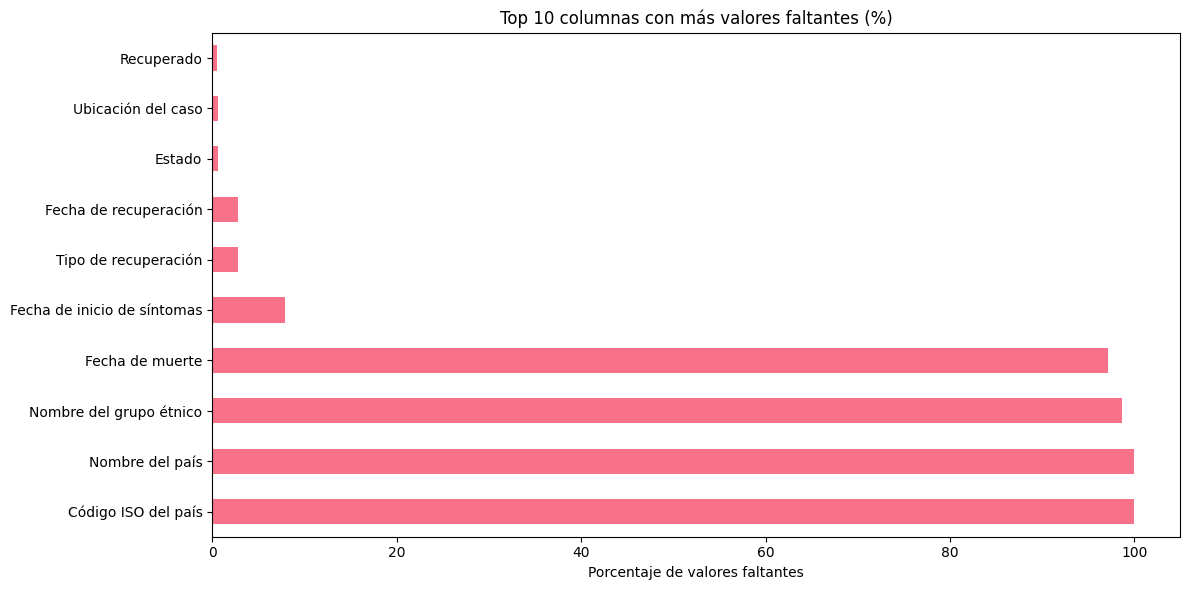

In [20]:
print("=== ANÁLISIS DE VALORES FALTANTES ===")
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
missing_df = pd.concat([missing, missing_percent], axis=1, keys=["Faltantes", "%"])

# Mostrar columnas con valores faltantes
print("Resumen de valores faltantes:")
print(missing_df[missing_df['Faltantes'] > 0])


# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
missing_plot = missing_df[missing_df['Faltantes'] > 0]['%'].head(10)
missing_plot.plot(kind='barh', title='Top 10 columnas con más valores faltantes (%)')
plt.xlabel('Porcentaje de valores faltantes')
plt.tight_layout()
plt.show()
